#  ARIMA
-  Auto-Arima

# AutoRegressive Integrated Moving Average (ARIMA) model
ARIMA is one of the time series forecasting models. It is a general class of models that includes different varieties.
#### A standard notation is used of ARIMA(p,d,q) .
- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.
- The values of p,q, and d, can  also finding by auto arima model, which find best values of the p,d,and q.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("daily-total-female-births.csv",index_col = 'Date')
data.index = pd.to_datetime(data.index)
print("The shape of the data :",data.shape)
data.head()

The shape of the data : (365, 1)


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [3]:
# checking for missing values
data.isnull().sum()

Births    0
dtype: int64

In [4]:
# trian and test set
train = data[:round(len(data) * 0.7)]
test = data[round(len(data) * 0.7):]
print(f"Shape of train data : {train.shape}")
print(f"Shape of test data : {test.shape}")

Shape of train data : (255, 1)
Shape of test data : (110, 1)


In [5]:
train.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


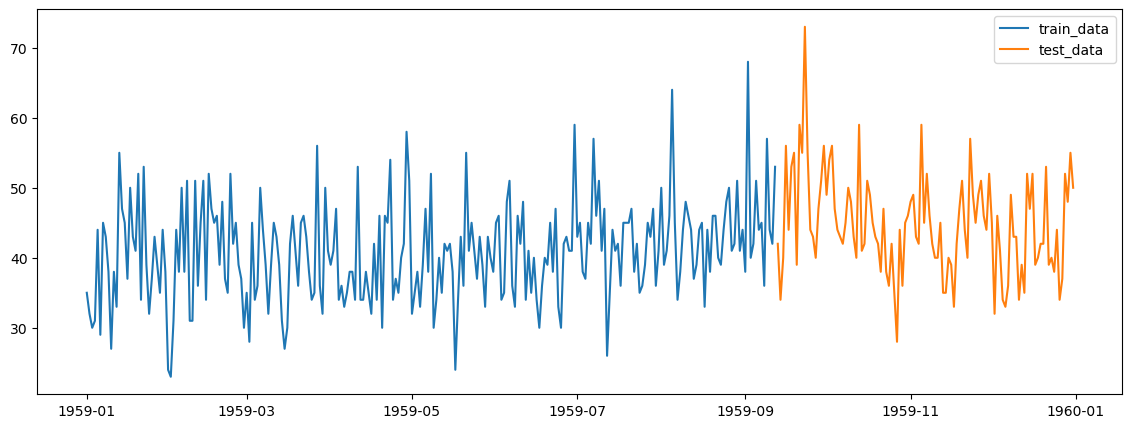

In [6]:
# univarite time series plot

plt.figure(figsize = (14,5))
plt.plot(train, label = 'train_data')
plt.plot(test,label = 'test_data')
plt.legend();

### model training with  auto_arima modules

In [7]:
#building the model
# from pyramid.arima import auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1869.861, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1805.833, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1867.875, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1784.887, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1771.923, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1762.979, Time=0.15 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1758.445, Time=0.13 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1756.596, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1761.096, Time=0.06 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1725.522, Time=0.20 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1723.547, T

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### prediction on train data

In [8]:
# forecasting on test data
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,columns=['Prediction'])
forecast.index = test.index
forecast.head()

,Prediction
Date,
1959-09-13,44.034635
1959-09-14,44.034635
1959-09-15,44.034635
1959-09-16,44.034635
1959-09-17,44.034635


### prediction on test data

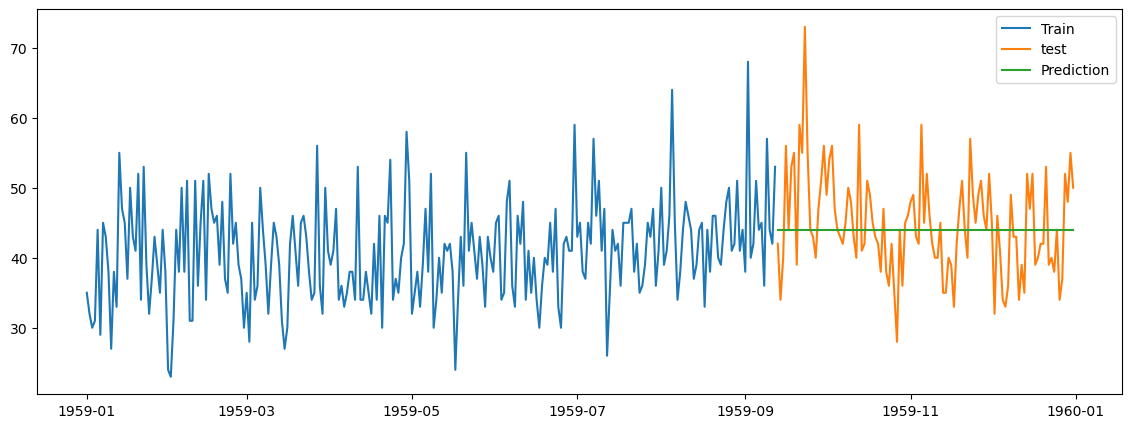

In [9]:
#plot the predictions for test data
plt.figure(figsize = (14,5))
plt.plot(train, label='Train')
plt.plot(test, label='test')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()

In [10]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test,forecast))
print("The root square mean erro :",rms)
print("The mean value of  the data: ",data.mean())

The root square mean erro : 7.236730086822111
The mean value of  the data:  Births    41.980822
dtype: float64
